# Линейная регрессия 

In [4]:
import random
import numpy as np
import torch
from torch.utils import data
from torch import nn
import matplotlib.pyplot as plt

In [5]:
SEED = 19
random.seed(SEED)
np.random.seed(SEED)
torch.random.manual_seed(SEED)
torch.cuda.random.manual_seed_all(SEED)

In [6]:
def synthetic_data(w, b, num_examples):
  X = np.random.normal(0, 1, size=(num_examples, len(w)))
  y = np.dot(X, w) + b
  y += np.random.normal(0, 0.01, size=y.shape)
  return X, y.reshape((-1,1))

In [7]:
true_w = np.array([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

In [8]:
X

array([[ 0.22100326, -0.34046501],
       [-0.57774854, -0.40403156],
       [-0.60328943, -0.24385228],
       ...,
       [-1.94121727, -0.04800423],
       [ 1.19402355,  0.83180267],
       [-0.27811981, -0.34769166]])

In [10]:
y[:6]

array([[5.80684387],
       [4.41125647],
       [3.82933057],
       [4.28049188],
       [9.68154841],
       [0.19037323]])

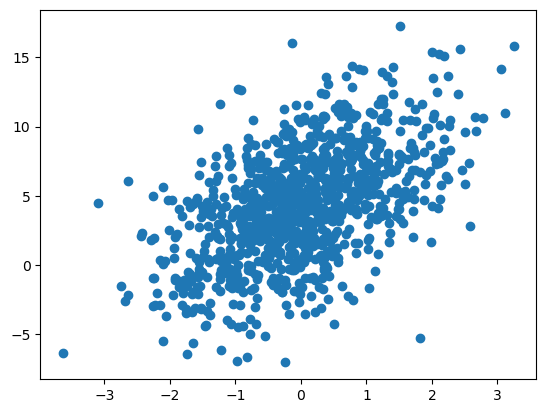

In [12]:
plt.scatter(X[:,0], y)

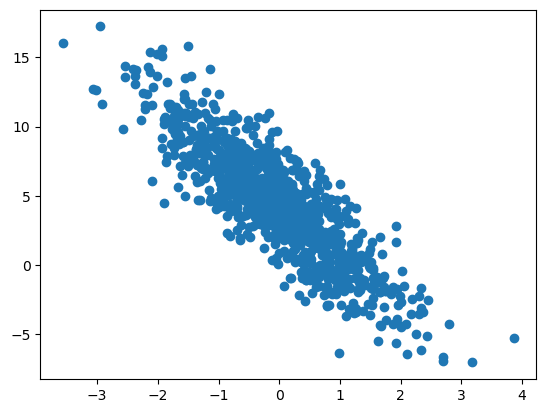

In [11]:
plt.scatter(X[:,1], y)

## Аналитическое решение 

### $$  \quad \hat{y_i} = w_1x_{1i} + w_2x_{2i}+b $$
### $$ W =(X^TX)^{-1} X^Ty $$
### $$W - параметры, \: X - обучающая \: выборка, \: y - таргет$$

In [31]:
class MultipleLinearRegression: 
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs

In [32]:
mlp = MultipleLinearRegression()

In [33]:
mlp.fit(X, y)

In [34]:
y_pred = mlp.predict(X)

In [35]:
mlp.coeffs

array([[ 2.00859328],
       [-3.55388395]])

## Градиентный спуск с нуля

### $$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{где} \quad \hat{y_i} = w_1x_{1i} + w_2x_{2i}+b $$
### $$𝑓(w_1,w_2,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (w_1x_{1i} + w_2x_{2i}+b))^2$$
### $$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$
### $$\frac{\partial f}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n}-2x_{1i}(y_i - (w_1x_{1i} + w_2x_{2i}+b))$$
### $$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (w_1x_{1i} + w_2x_{2i}+b))$$

### С использованием numpy

In [ ]:
def gradient_descent(X, y, lr=0.05, num_epoch=100):
    w = np.random.normal(0, 0.01, (2,1))
    b = np.random.normal(1)
    N = len(X)
    for _ in range(num_epoch):    
        f = y - (X.dot(w) + b)
        w = w - (lr * (-2 * X *f ).sum(axis=0)).reshape(2,1) / N 
        b -= lr * (-2 * f.sum() / N)      
    
    return w, b

In [36]:
class MultipleLinearRegression:
    def fit(self, X, y, lr=0.05, num_epoch=100):
        self.w = np.random.normal(0, 0.01, (2,1))
        self.b = np.random.normal(1)
        N = len(X)
        for _ in range(num_epoch):    
            f = y - (X.dot(self.w) + self.b)
            self.w = self.w - (lr * (-2 * X *f ).sum(axis=0)).reshape(2,1) / N
            self.b = self.b - lr * (-2 * f.sum() / N)  
            
    def predict(self, X):
        return X.dot(self.w) + self.b
            
    def coeffs(self):
        return self.w, self.b

In [37]:
mlp = MultipleLinearRegression()

In [38]:
mlp.fit(X, y, lr=0.01, num_epoch=1000)

In [39]:
y_pred = mlp.predict(X)

In [40]:
mlp.coeffs()

(array([[ 1.99929904],
        [-3.40000593]]),
 4.2001783227297755)

## Стахостический градиентый спуск

### С использованием numpy

In [45]:
def SGD(X, y, lr=0.05, num_epoch=10, batch_size=5):
    w = np.random.normal(0, 0.01, (2,1))
    b = np.random.normal(1)
    
    for _ in range(num_epoch):
        indexes = np.random.randint(0, len(X), batch_size)
        Xs = np.take(X, indexes, axis=0)
        ys = np.take(y, indexes, axis=0)
        Ns = batch_size
       
        f = ys - (Xs.dot(w) + b)
        w = w - (lr * (-2 * Xs *f ).sum(axis=0)).reshape(2,1) / Ns 
        b -= lr * (-2 * f.sum() / Ns)           
    
    return w, b

In [ ]:
class MultipleLinearRegression:
    def fit():
        # твой код здесь
        pass
        
    def predict():
        # твой код здесь
        pass
            
    def coeffs():
        # твой код здесь
        pass

### С использованием  Pytorch autograd

In [96]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1,1))

In [97]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

In [98]:
X

tensor([[-0.9259,  1.5168],
        [ 1.0025,  0.9228],
        [ 1.8937, -0.3990],
        ...,
        [ 0.2735, -0.1851],
        [ 1.0880, -0.0250],
        [ 0.9456,  0.2287]])

In [99]:
y[:5]

tensor([[-2.8083],
        [ 3.0746],
        [ 9.3383],
        [ 7.6024],
        [ 3.9868]])

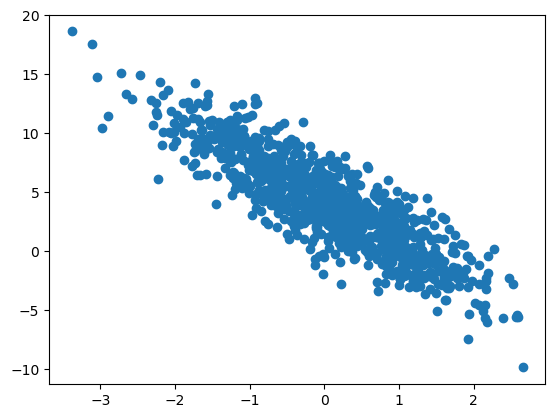

In [100]:
plt.scatter(X[:,1].numpy(), y.numpy())

In [101]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
      batch_indices = torch.tensor(
          indices[i: min(i + batch_size, num_examples)])
      yield features[batch_indices], labels[batch_indices]


In [102]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [103]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [104]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2/2

In [105]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [126]:
lr = 0.005
num_epochs = 100
net = linreg
loss = squared_loss
optimizer = sgd 
batch_size = 10

In [127]:
batch_size

10

In [128]:
for epoch in range(num_epochs):
  for X_train, y_ytain in data_iter(batch_size, X, y):
    l = loss(net(X_train, w, b), y_ytain)
    l.sum().backward()
    optimizer([w, b], lr, batch_size)

  with torch.no_grad():
    train_l = loss(net(X_train, w, b), y_ytain)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.165997
epoch 2, loss 0.046787
epoch 3, loss 0.032038
epoch 4, loss 0.009863
epoch 5, loss 0.001966
epoch 6, loss 0.002242
epoch 7, loss 0.000548
epoch 8, loss 0.000066
epoch 9, loss 0.000073
epoch 10, loss 0.000070
epoch 11, loss 0.000047
epoch 12, loss 0.000039
epoch 13, loss 0.000059
epoch 14, loss 0.000075
epoch 15, loss 0.000037
epoch 16, loss 0.000027
epoch 17, loss 0.000064
epoch 18, loss 0.000041
epoch 19, loss 0.000030
epoch 20, loss 0.000122
epoch 21, loss 0.000045
epoch 22, loss 0.000049
epoch 23, loss 0.000082
epoch 24, loss 0.000084
epoch 25, loss 0.000028
epoch 26, loss 0.000029
epoch 27, loss 0.000058
epoch 28, loss 0.000051
epoch 29, loss 0.000072
epoch 30, loss 0.000026
epoch 31, loss 0.000048
epoch 32, loss 0.000067
epoch 33, loss 0.000055
epoch 34, loss 0.000061
epoch 35, loss 0.000084
epoch 36, loss 0.000028
epoch 37, loss 0.000046
epoch 38, loss 0.000079
epoch 39, loss 0.000037
epoch 40, loss 0.000035
epoch 41, loss 0.000051
epoch 42, loss 0.000088
e

In [129]:
w

tensor([[ 2.0000],
        [-3.3998]], requires_grad=True)

In [130]:
b

tensor([4.2005], requires_grad=True)

### С использованием Pytorch API

In [131]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [132]:
def load_array(data_arrays, batch_size, is_train=True):
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size=batch_size, shuffle=is_train)

In [133]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [134]:
net = nn.Sequential(nn.Linear(2,1))

In [135]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [136]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [137]:
num_epoch = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    y_pred = net(X)
    l = loss(y_pred, y)
    l.backward()
    trainer.step()
    trainer.zero_grad()

  l = loss(net(features), labels)
  print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000243
epoch 2, loss 0.000105
epoch 3, loss 0.000105
epoch 4, loss 0.000105
epoch 5, loss 0.000105
epoch 6, loss 0.000105
epoch 7, loss 0.000105
epoch 8, loss 0.000105
epoch 9, loss 0.000106
epoch 10, loss 0.000105
epoch 11, loss 0.000105
epoch 12, loss 0.000105
epoch 13, loss 0.000105
epoch 14, loss 0.000104
epoch 15, loss 0.000105
epoch 16, loss 0.000104
epoch 17, loss 0.000105
epoch 18, loss 0.000105
epoch 19, loss 0.000106
epoch 20, loss 0.000104
epoch 21, loss 0.000105
epoch 22, loss 0.000105
epoch 23, loss 0.000105
epoch 24, loss 0.000106
epoch 25, loss 0.000105
epoch 26, loss 0.000106
epoch 27, loss 0.000106
epoch 28, loss 0.000105
epoch 29, loss 0.000105
epoch 30, loss 0.000105
epoch 31, loss 0.000104
epoch 32, loss 0.000105
epoch 33, loss 0.000105
epoch 34, loss 0.000107
epoch 35, loss 0.000104
epoch 36, loss 0.000104
epoch 37, loss 0.000105
epoch 38, loss 0.000105
epoch 39, loss 0.000105
epoch 40, loss 0.000104
epoch 41, loss 0.000105
epoch 42, loss 0.000106
e

In [138]:
w

tensor([[ 2.0000],
        [-3.3998]], requires_grad=True)

In [139]:
b

tensor([4.2005], requires_grad=True)